## 4. Analysing wine qualities

This is an example of using PCA, k-means clustering and DBSCAN to first reduce the dimensionality of a wine quality dataset and then to assign the data into clusters. Dimensionality reduction and clustering can help us create a dataset for training a classification algorithm such as k nearest neighbours, which you will see next week.

Adaped from https://pubs.acs.org/doi/10.1021/acs.jchemed.1c00142

### 4.1. Loading the data

In [189]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import cluster
import os
import warnings
warnings.filterwarnings("ignore")

In [177]:
data_path='data'
if os.environ.get('COLAB_RELEASE_TAG') is None:
    data_path = os.path.join('..','data')

In [186]:
filename = "wine_data.csv"
dataframe = pd.read_csv(data_path + "/" + filename)
dataframe.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### 4.2 Cleaning up and normalising the data

First we have to clean up the dataframe slightly, because it contains information that we do not want to include in our PCA analysis; Namely, we need to drop the `quality` column as it is a categorigal variable, and the `wine` column as that is our target variable for analysis and prediction.

Furthermore, since the variables do not all have the same range, we need to normalise the data. The normalisation is carried out by subtracting the mean from the data and dividing it by the standard deviation, i.e.

$$ Z = \frac{\mathbf{x} - \mu}{\sigma} $$

where $\mathbf{x}$ is the data. 


<div class="alert alert-success">
<b>Task 1:</b> Normalising the data

- Create a new dataframe, e.g. `clean_data` which does not contain the columns `quality` and `wine`.
- Normalise the cleaned wine data and name the new datafrane, e.g. `normalised_data`. 

In [191]:
### Your solution here:
clean_data = dataframe.drop(columns=["quality", "wine"])
mean = clean_data.mean()
standard_deviation = clean_data.std()
normalised_data = (clean_data - mean) / standard_deviation

<details>
<summary> <mark> Solution: </mark> </summary>

```Python

clean_data = dataframe.drop(columns=["quality", "wine"])
mean = clean_data.mean()
standard_deviation = clean_data.std()
normalized_data = (clean_data - mean) / standard_deviation

```

</details>

### 4.3 Task section

<div class="alert alert-success">
<b>Task 1: Principal components analysis of wine qualities </b>

- Perform a PCA analysis of the normalised dataset using two components. What is the variance contribution of the components? 
- Plot the principal components, labeling your axes. 

</div>

[0.29428733 0.21363172]


Text(0, 0.5, 'PC 2')

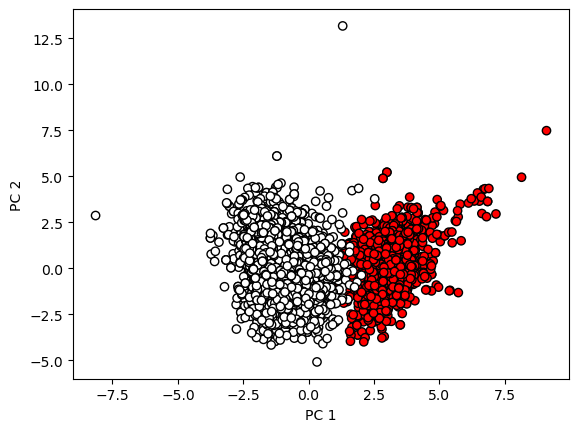

In [237]:
### Your solution here:

pca = decomposition.PCA(n_components=2)
pca_results = pca.fit_transform(normalised_data)
print(pca.explained_variance_ratio_)

fig, ax = plt.subplots()
ax.scatter(pca_results[:, 0], pca_results[:, 1], c=dataframe["wine"], edgecolor="k") # COLOURING ACCORDING TO WINE
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")

<div class="alert alert-success">
<b>Task 3: K-means analysis of wine qualities </b>

- Perform a k-means analysis of the PCA results. How many clusters are there? 
- Plot the results, labeling your axes and marking the cluster centres. 

</div>

In [249]:
### Your solution here


<details>
<summary> <mark> Solution:</mark> </summary>

```Python

kmeans = cluster.KMeans(n_clusters=3) 
dataframe["cluster"] = kmeans.fit(pca_results)

fig, ax = plt.subplots()

ax.scatter(pca_results[:, 0], pca_results[:, 1], s=5, linewidth=0, c="gray", alpha=0.7)
cluster_centers = kmeans.cluster_centers_

for cluster_x, cluster_y in kmeans.cluster_centers_:
    ax.scatter(cluster_x, cluster_y, s=100, c='r', marker='x')

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
fig.show()
```

</details>

<div class="alert alert-success">
<b>Task 4:  Try using DBSCAN to cluster this dataset.</b>
</div>


In [242]:
### Your solution here

<details>
<summary> <mark> Solution</mark> </summary>

```Python
db = cluster.DBSCAN(eps=0.5)
db.fit(pca_results[::10])

clusters = db.labels_.astype(int)
no_clusters = len(np.unique(clusters) )
no_noise = np.sum(np.array(clusters) == -1, axis=0)

print(f'Estimated no. of clusters: {no_clusters}')
print(f'Estimated no. of noise points: {no_noise}')
    
fig, ax = plt.subplots()
ax.scatter(pca_results[::10,0], pca_results[::10,1], c=clusters, marker="o", picker=True)
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")

```

Estimated no. of clusters: 3
Estimated no. of noise points: 29


Text(0, 0.5, 'PC 2')

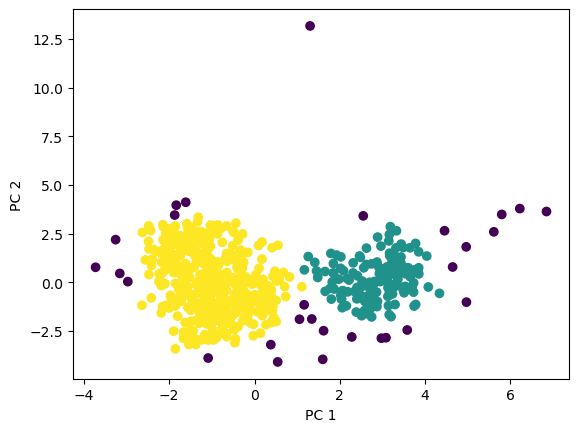

In [268]:
db = cluster.DBSCAN(eps=0.5)
db.fit(pca_results[::10])

clusters = db.labels_.astype(int)
no_clusters = len(np.unique(clusters) )
no_noise = np.sum(np.array(clusters) == -1, axis=0)

print(f'Estimated no. of clusters: {no_clusters}')
print(f'Estimated no. of noise points: {no_noise}')
    
fig, ax = plt.subplots()
ax.scatter(pca_results[::10,0], pca_results[::10,1], c=clusters, marker="o", picker=True)
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")

In [179]:
# saving data for students:
# df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
# df['wine']='red'
# df2=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")
# df2['wine']='white'
# wine = pd.concat([df, df2], ignore_index=True)
# wine.to_csv(os.path.join(data_path, "wine_data.csv"), index_label="index")